# Single Systems
* Last updated on 9/15/2023

In [1]:
import numpy as np

## Numpy array

In [2]:
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])
display(ket0)
display(ket1)
print(ket0)
print(ket1)

array([1, 0])

array([0, 1])

[1 0]
[0 1]


In [3]:
ket0/2 + ket1/2

array([0.5, 0.5])

In [4]:
M1 = np.array([[1, 1],
               [0, 0]])
M2 = np.array([[1, 1],
               [1, 0]])

In [5]:
M1/2 + M2/2

array([[1. , 1. ],
       [0.5, 0. ]])

In [6]:
M1 @ M2

array([[2, 1],
       [0, 0]])

In [7]:
M2 @ ket0

array([1, 1])

## Qiskit statevector
https://docs.quantum-computing.ibm.com/api/qiskit/qiskit.quantum_info.Statevector

In [8]:
from qiskit.quantum_info import Statevector

### Create a statevector

In [9]:
u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
v = Statevector([(1 + 2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

In [10]:
print(u)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


### Diaply a statevector

In [11]:
u

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [12]:
u.draw("latex")

<IPython.core.display.Latex object>

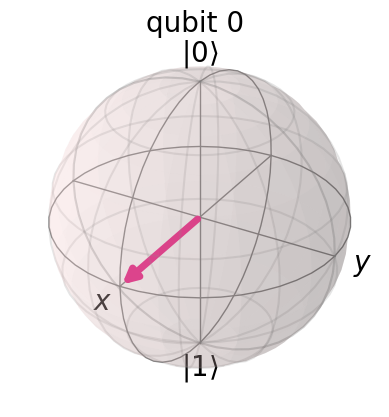

In [13]:
u.draw("bloch")

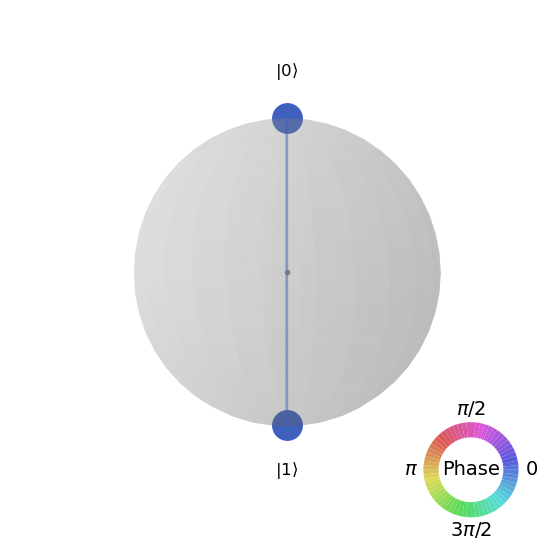

In [14]:
u.draw("qsphere")

### Inner product
* self.inner(other)=$\langle self|other\rangle$.

In [15]:
u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
v = Statevector([(1 + 2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

In [16]:
u.inner(u)

(0.9999999999999998+0j)

In [17]:
display(u.inner(v))
display(v.inner(u))

(-0.2357022603955158+0.4714045207910316j)

(-0.2357022603955158-0.4714045207910316j)

In [44]:
~u

TypeError: bad operand type for unary ~: 'Statevector'

### Check a statevector
* A valid state vector should have its Euclidean norm equal to 1.

In [18]:
u.is_valid()

True

In [19]:
uu = u/2
uu.is_valid()

False

In [20]:
w.is_valid()

False

### Measurement of a statevector
* The quantum state is projected onto the standard basis. 
* The original quantum state is NOT distroyed.

In [21]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v0 = Statevector([(1 + 2.0j) / 3, 0])
v0 = v0/np.sqrt(v0.inner(v0))
v1 = Statevector([0, -2 / 3])
v1 = v1/np.sqrt(v1.inner(v1))

display(v.draw("latex"))
print(v)
display(v0.draw("latex"))
print(v0)
display(v1.draw("latex"))
print(v1)

<IPython.core.display.Latex object>

Statevector([ 0.33333333+0.66666667j, -0.66666667+0.j        ],
            dims=(2,))


<IPython.core.display.Latex object>

Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
            dims=(2,))


<IPython.core.display.Latex object>

Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


In [22]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

In [23]:
v

Statevector([ 0.33333333+0.66666667j, -0.66666667+0.j        ],
            dims=(2,))


In [24]:
for _ in range(10):
    out, state = v.measure()
    print(out, state)

0 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
            dims=(2,))
1 Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))
1 Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))
1 Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))
1 Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))
1 Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))
0 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
            dims=(2,))
0 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
            dims=(2,))
1 Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))
0 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
            dims=(2,))


### Plot distribution
* 'qiskit.visualization.plot_histogram' is dprecated.

In [25]:
from qiskit.visualization import plot_distribution

{'0': 547, '1': 453}

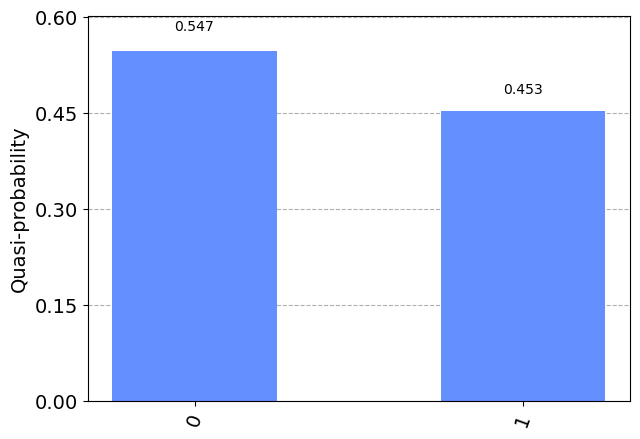

In [26]:
statistics = v.sample_counts(1000)
display(statistics)
plot_distribution(statistics)

## Qiskit operator
* O|v> = v.evolve(O)

In [27]:
from qiskit.quantum_info import Operator

In [28]:
X = Operator([[0, 1], [1, 0]])
display(X)
v = Statevector([1, 0])
display(v.draw("latex"))
v = v.evolve(X)
display(v.draw("latex"))
v = v.evolve(X)
display(v.draw("latex"))

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [29]:
X

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

## Qiskit quantum circuit

In [30]:
from qiskit import QuantumCircuit

### Single qubit quantum circuit

In [31]:
circuit = QuantumCircuit(1)
display(circuit.draw())

q:

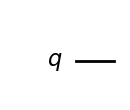

In [32]:
display(circuit.draw('mpl'))

In [33]:
circuit.h(0)
display(circuit.draw())

┌───┐
q: ┤ H ├
   └───┘

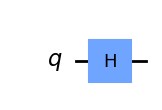

In [34]:
display(circuit.draw('mpl'))

In [35]:
circuit.t(0)
display(circuit.draw())

┌───┐┌───┐
q: ┤ H ├┤ T ├
   └───┘└───┘

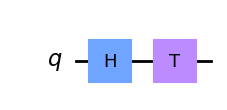

In [36]:
display(circuit.draw('mpl'))

In [37]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[0.70710678+0.j ,0.5       +0.5j]

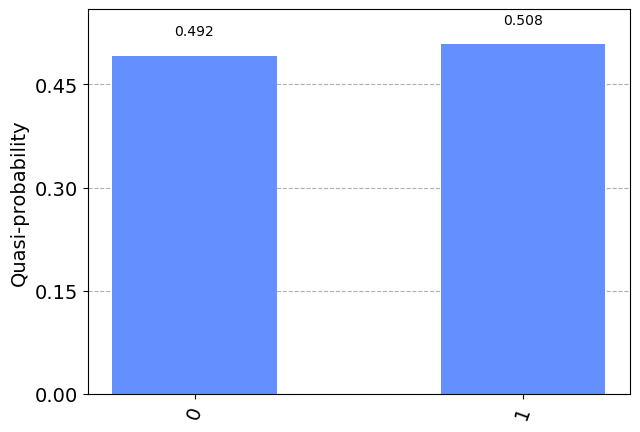

In [38]:
statistics = v.sample_counts(4000)
plot_distribution(statistics)